In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traffic/traffic_wala_dataset/data.yaml
/kaggle/input/traffic/traffic_wala_dataset/valid/labels/12_mp4-10_jpg.rf.4bb699a2ec90e19cb4680ee239ae579c.txt
/kaggle/input/traffic/traffic_wala_dataset/valid/labels/6_mp4-31_jpg.rf.c786274ab129629ca618e454b4146f11.txt
/kaggle/input/traffic/traffic_wala_dataset/valid/labels/6_mp4-29_jpg.rf.e73ca25e92e590b325006f010ad4e319.txt
/kaggle/input/traffic/traffic_wala_dataset/valid/labels/4_mp4-8_jpg.rf.1d199d41f6c3738763c192883ad1a5b4.txt
/kaggle/input/traffic/traffic_wala_dataset/valid/labels/7_mp4-24_jpg.rf.ed2484fe45c32f27443cccd8bbf99361.txt
/kaggle/input/traffic/traffic_wala_dataset/valid/labels/2_mp4-1_jpg.rf.b52c12a365fbeb71e302f0505038959b.txt
/kaggle/input/traffic/traffic_wala_dataset/valid/labels/test2_mp4-21_jpg.rf.bbb3ba4e4b69e5a12822300829bf75f0.txt
/kaggle/input/traffic/traffic_wala_dataset/valid/labels/7_mp4-11_jpg.rf.02a513fa7473144494b7a53fc14b6560.txt
/kaggle/input/traffic/traffic_wala_dataset/valid/labels/3_mp4-2_jpg.rf.f

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [2]:
import yaml

# Step 1: Read YAML from input folder (read-only)
with open("/kaggle/input/traffic/traffic_wala_dataset/data.yaml", "r") as f:
    data = yaml.safe_load(f)

# Step 2: Make changes (e.g., update class names)
data["train"] = ['/kaggle/input/traffic/traffic_wala_dataset/train/images']
data["val"] = ['/kaggle/input/traffic/traffic_wala_dataset/valid/images']

# Step 3: Save modified YAML to working directory (writable)
with open("/kaggle/working/data.yaml", "w") as f:
    yaml.dump(data, f)


In [3]:
import os
os.makedirs('/kaggle/working/empty_test', exist_ok=True)


In [4]:
with open("/kaggle/working/data.yaml", "r") as f:
    data = yaml.safe_load(f)
    
data['test'] = '/kaggle/working/empty_test'

# Save the modified YAML
with open('/kaggle/working/data.yaml', 'w') as f:
    yaml.dump(data, f)

In [5]:
with open('/kaggle/working/data.yaml', 'r') as f:
    print(f.read())

names:
- Vehicle
nc: 1
roboflow:
  license: CC BY 4.0
  project: vehicle_detection_yolov8
  url: https://universe.roboflow.com/farzad/vehicle_detection_yolov8/dataset/3
  version: 3
  workspace: farzad
test: /kaggle/working/empty_test
train:
- /kaggle/input/traffic/traffic_wala_dataset/train/images
val:
- /kaggle/input/traffic/traffic_wala_dataset/valid/images



In [6]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLO12n model




Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [10]:
!git clone https://github.com/ultralytics/yolov5.git
!cd yolov5


Cloning into 'yolov5'...
remote: Enumerating objects: 17493, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 17493 (delta 1), reused 0 (delta 0), pack-reused 17490 (from 3)
Receiving objects: 100% (17493/17493), 16.56 MiB | 30.94 MiB/s, done.
Resolving deltas: 100% (11996/11996), done.


In [11]:
import sys
sys.path.append('/path/to/yolov5')  # Replace with actual path


In [72]:
pip install torchmetrics


Note: you may need to restart the kernel to use updated packages.


In [7]:
!yolo task=detect mode=train model=yolo12n.pt data=/kaggle/working/data.yaml epochs=200 imgsz=640 batch=16 cutmix=0.6 mosaic=0.6 


100%|██████████████████████████████████████| 5.34M/5.34M [00:00<00:00, 74.4MB/s]
Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.6, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=0.6, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, over

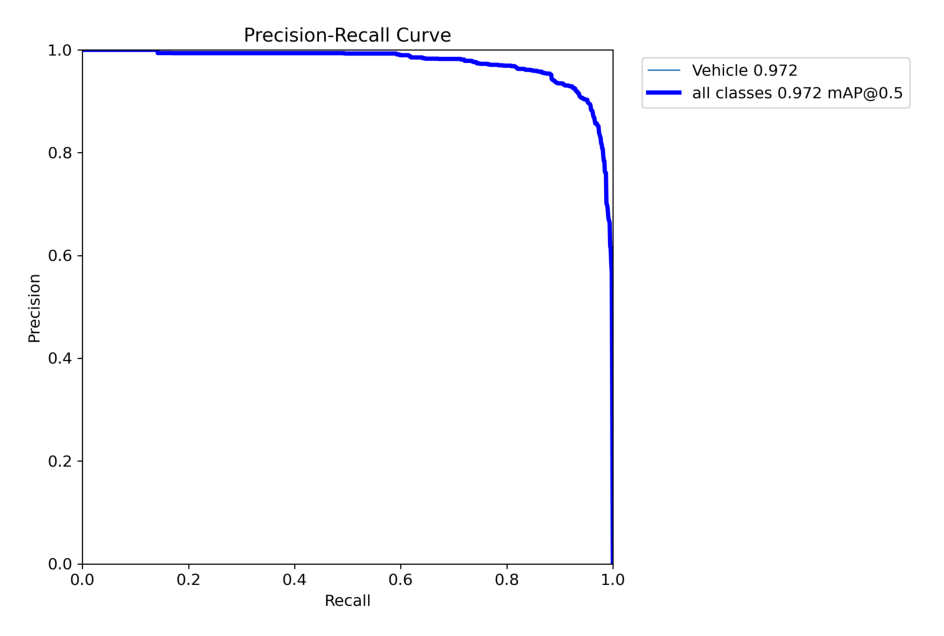

In [9]:
import cv2
import matplotlib.pyplot as plt

img_path = '/kaggle/working/runs/detect/train/PR_curve.png'  # Change filename accor  cdingly

# Read image with OpenCV (BGR)
img = cv2.imread(img_path)

# Convert BGR to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()
